# Analysis of Crimes Against Women in India
# Nidhi Allani, Ernev Sharma, Urisha Kreem

# INTRODUCTION

Just last year, India was ranked the <a href="https://www.cnn.com/2018/06/25/health/india-dangerous-country-women-survey-intl/index.html" target="_blank">the most dangerous country</a> for a woman to live in. Recently, there has been a lot of attention brought to tragic <a href="https://gulfnews.com/world/asia/india/priyanka-reddy-murder-and-hyderabad-encounter-police-suspect-men-in-vets-horrific-rape-murder-were-involved-in-similar-crimes-across-3-states-1.1575644027665" target="_blank">murder of Prianka Reddy.</a> Many cultural traditions such as forced labor, child marriage, and physical abuse place women in continuous danger. More than this, however, there are many different types of crimes, each with their own motivations, that are commonly committed against women. In this tutorial we will review some of the most common crimes against women, and analyze them across states and over time. Furthermore, we will attempt to find a correlation between these crimes against women and Gross Domestic Product (GDP). These discoveries may help identify trends in crimes, states where crime is most frequent, potential effective policy changes, and perhaps even a predictor. We will not be able to draw these conclusions unless we are able to explore and analyze our data through visualizations.



The relevance and importance of this topic in respect to data science is that through data analysis of the information we have access to, it will give us insight to crucial information to which we can hopefully use to minimize crimes dependent on a specific pattern, and bring about awareness of the patterns and insights we uncover. The crimes against women, who have been historically marginalized in India, represent an extreme form of prejudice and discrimination and thus we aim to provide the numbers and data in a way that allows us to exploit such occurances backed up with numbers - to bring light to the issue and bring about change. 
Throughout this tutorial we attempt to uncover these trends of hate crimes in India in a clear, concise manner - making the data available at hand easy to be interpreted and understood by the public. 


# DATA COLLECTION 

# Imports: 

In [157]:
import requests #for get request
import re #regex
import pandas as pd #pandas
import numpy as np #module
from bs4 import BeautifulSoup #beautify the soup
from datetime import datetime #datetime objects
import json #needed for google API
import os.path #needed for file reading
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for visualizations
from sklearn import linear_model #for linear regression
from sklearn.preprocessing import PolynomialFeatures #polynomial regression
os.system('jupyter nbconvert --to html FinalProject.ipynb')
from operator import itemgetter 
!pip install folium
import folium 

# Data Extraction: 

The dataset includes information about crimes against women per state for the years of 2001-2012. There are different categories of crime listed alongside the chosen acronym.  



    1. AWITOM = ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY	
    2. CBHOR = CRUELTY BY HUSBAND OR HIS RELATIVES (IPC SECTION 498A)
    3. DD = DOWRY DEATHS
    4. DPA = DOWRY PROHIBITION ACT
    5. ITA = IMMORAL TRAFFIC (P) ACT
    6. IOGFFC = IMPORTATION OF GIRLS FROM FOREIGN COUNTRY
    7. IROWA = INDECENT REPRESENTATION OF WOMEN (P) ACT
    8. ITMOW = INSULT TO THE MODESTY OF WOMEN
    9. K&A = KIDNAPPING AND ABDUCTION
    10. RAPE 
    11. TOTAL CRIMES 
    
Below is the official documentation for these crimes in the Indian Penal Code. Each comes with an explanation and general punishment.    

<a href="https://devgan.in/ipc/section/354/" target="_blank">AWITOM</a>

<a href="https://devgan.in/ipc/section/498A/" target="_blank">CBHOR</a>

<a href="https://devgan.in/ipc/section/304B/" target="_blank">DD</a>

<a href="https://devgan.in/ipc/section/304B/" target="_blank">DPA</a>

ITA

<a href="https://devgan.in/ipc/section/366B/" target="_blank">IOGFFC</a>

IROWA

<a href="https://devgan.in/ipc/section/509/" target="_blank">ITMOW</a>

<a href="https://devgan.in/ipc/section/363/" target="_blank">K&A</a>

<a href="https://devgan.in/ipc/section/376/" target="_blank">Rape</a>



In [158]:
#load raw data
data = pd.read_csv("pacCAW.csv")
data = data.rename(columns = {data.columns[0]:'State', data.columns[1]:'Crime'})
data


,State,Crime,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,RAPE,1150,1340,1237,1443,1415,1360,1436,1531,1487,1761,1758,1664
1,ARUNACHAL PRADESH,RAPE,51,61,35,56,38,40,57,37,60,49,47,47
2,ASSAM,RAPE,928,1019,1188,1233,1406,1290,1477,1445,1644,1629,1470,1626
3,BIHAR,RAPE,1400,1304,1120,1157,1455,1451,1816,1464,1086,892,1185,1327
4,CHHATTISGARH,RAPE,1134,1214,1020,1144,1107,1211,1146,1108,1128,1198,1257,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,DELHI,TOTAL CRIMES AGAINST WOMEN,3124,3080,4789,5196,5853,6207,5648,3115,2753,3040,3475,3981
452,LAKSHADWEEP,TOTAL CRIMES AGAINST WOMEN,0,3,3,1,0,1,2,2,2,1,0,1
453,PUDUCHERRY,TOTAL CRIMES AGAINST WOMEN,223,246,221,173,191,260,337,191,152,205,205,110
454,TOTAL (UTs),TOTAL CRIMES AGAINST WOMEN,3621,3588,5289,5792,6434,6922,6435,3724,3249,3612,3963,4508


**TIDYING DATA**

First thing we noticed was that the column headers were values. The data needed tidying, and we needed to melt.

In [159]:
id_vars = ["State", "Crime"]

data = pd.melt(frame=data,id_vars=id_vars, var_name="year", value_name="rank")

# In order to complete the transformation, we pivoted the Crime column so that the type of crimes
# were matched with their counts per year.
data = data.pivot_table(values='rank', index=["State", "year"], columns='Crime', aggfunc='first').reset_index(level='State')
# Lengthy Renaming of columns to acronyms
data = data.rename(columns = {data.columns[1]:'AWITOM', data.columns[2]:'COS', data.columns[3]:'CBHOR', data.columns[4]:'DD', data.columns[5]:'DPA', data.columns[6]:'ITA', data.columns[7]:'IOGFFC', data.columns[8]:'IROWA', data.columns[9]:'ITMOW', data.columns[10]:'K&A', data.columns[11]:'RAPE', data.columns[12]:'TOTAL CRIMES'})

# 12 years per (29 states + 7 Union districts + 2 extra totals = 38) = 456 rows
# 11 different crimes + State and year = 13 columns
print(data.shape)
data

(456, 13)


Crime,State,AWITOM,COS,CBHOR,DD,DPA,ITA,IOGFFC,IROWA,ITMOW,K&A,RAPE,TOTAL CRIMES
year,,,,,,,,,,,,,
2001,A & N ISLANDS,19,0,7,0,0,0,0,0,1,4,3,34
2002,A & N ISLANDS,17,0,3,0,0,0,0,0,3,1,6,30
2003,A & N ISLANDS,12,0,15,0,0,0,0,0,2,1,6,36
2004,A & N ISLANDS,13,0,15,0,0,0,0,0,3,2,11,44
2005,A & N ISLANDS,14,0,7,0,0,0,0,0,3,0,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,WEST BENGAL,1584,0,17521,1082,97,232,6,3,156,1857,1790,24328
2009,WEST BENGAL,1640,0,13884,1002,74,238,7,0,120,1958,1748,20671
2010,WEST BENGAL,1841,0,18387,1124,142,227,11,3,165,2254,2395,26549


Here we make the decision to drop COS, which is crimes against the Commision of Sati Act. Thankfully this prehistoric tradition has been discontinued. For those interested in one of the most aggregious cultures to put women in danger, <a href="https://www.cnn.com/2018/06/25/health/india-dangerous-country-women-survey-intl/index.html" target="_blank">here</a>
 is an article on it.  

In [160]:
data = data.drop('COS', axis=1)

As discussed in our introduction, we want to explore the trends and relationships between GDP and crimes against women. We scraped this data and proceeded to shape it to be an identical schema as the table above. There is a lot of hacky code here that allows us to scrape the correct tables. The official source is cited below.

Source: *For Sl. No. 1-32 -- Directorate of Economics Statistics of respective State Governments, and for All-India — Central Statistical Organisation;*

In [161]:
url = requests.get("https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP#cite_note-planningCommission-1");
page = BeautifulSoup(url.content, "html.parser")

# Begin by finding title
searchtext = re.compile(r'Nominal GSDP from 2011–12 to 2020–21')
foundtext = page.find('span', id="Nominal_GSDP_from_2011–12_to_2020–21", text=searchtext)
# and then finding the first table to occur after it
table = foundtext.findNext('table')

rows = table.findAll('tr')
l = []
for tr in rows[1:]:
    cols = tr.findAll('td')
    
    # ~Hacky fixes~
    row = [td.text for td in cols[0:3]]
    row[0] = row[0].strip().upper()
    if row[0] == 'ANDAMAN AND NICOBAR ISLANDS':
        row[0] = "A & N ISLANDS"
    if row[0] == 'TELANGANA':
        continue
    row[1] = int(row[1].strip().replace(",", ""))
    row[2] = int(row[2].strip().replace(",", ""))
    # -- 
    
    l.append(row)
nominal2 = pd.DataFrame(l, columns=["State", "2011", "2012"])


# Repeat for 2001-2010 graph
searchtext = re.compile(r'Nominal GDP from 2001–02 to 2010–11')
foundtext = page.find('span', id="Nominal_GDP_from_2001–02_to_2010–11", text=searchtext)
table = foundtext.findNext('table')
rows = table.findAll('tr')
l = []

for tr in rows[1:]:
    cols = tr.findAll('td')
    
    # ~Hacky fixes~

    row = [td.text.strip() for td in cols[0:11]]
    row[0] = row[0].upper()
    if row[0] == 'ANDAMAN AND NICOBAR ISLANDS':
        row[0] = "A & N ISLANDS"
    if row[0] == 'TELANGANA': 
        continue
    
    for i in range(1,11):
        row[i] = int(row[i].replace(",", ""))
    #--    
        
        
    l.append(row)


columns=["State", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010"]
nominal1 = pd.DataFrame(l, columns=columns)
nominal1.loc[:,'2011'] = nominal2["2011"]
nominal1.loc[:,'2012'] = nominal2["2012"]

In [162]:
# GDP data does not have the following areas: Dadra and Nagar Haveli, Daman and Diu and Lakshadweep.
# We rename certain State's in data
data.loc[data['State'] == 'TOTAL (ALL-INDIA)', 'State'] = "INDIA"
data[data.State == "INDIA"]

# # First we must tidy the GDP data
gdp = pd.melt(frame=nominal1, id_vars=["State"], var_name="year", value_name="GDP")
gdp[gdp.State == "INDIA"]

,State,year,GDP
0,INDIA,2001,2097726
33,INDIA,2002,2261415
66,INDIA,2003,2538170
99,INDIA,2004,2971464
132,INDIA,2005,3390503
165,INDIA,2006,3953276
198,INDIA,2007,4582086
231,INDIA,2008,5303567
264,INDIA,2009,6108903
297,INDIA,2010,7248860


One thing we want to be sure of is that our data set does not have any values of 'NaN' or *. These values are essentially data that was unable to be collected, or is simply missing. To do further analysis we need to deal with these values in a strategic way. This leads us to Data Processing - where we will attempt to clean up the data presented to us in a way that is easily readable and provides us the most efficient ways of analysis later on.

# Data Processing:

In [163]:
data.dropna(inplace=True) # Drop all rows that have "NaN" as an entry 
gdp.dropna(inplace=True)

Here we merge the GDP and data dataframes for future use. We do an inner join to remove the certain states that did not have a calculated GDP.

In [164]:
# Join GDP and CrimeData

state_data = gdp.merge(data, left_on=['State', 'year'], right_on=['State', 'year'], how='inner')
state_data[state_data.year == "2001"]


,State,year,GDP,AWITOM,CBHOR,DD,DPA,ITA,IOGFFC,IROWA,ITMOW,K&A,RAPE,TOTAL CRIMES
0,INDIA,2001,2097726,42244,109467,20381,7056,12823,220,694,12439,17819,20446,243589
1,ANDHRA PRADESH,2001,156711,3639,9725,1054,1042,1860,6,509,2268,965,1150,22218
2,ARUNACHAL PRADESH,2001,2104,95,9,0,0,0,0,0,3,60,51,218
3,ASSAM,2001,38313,1161,1515,95,197,6,0,1,11,1583,928,5497
4,BIHAR,2001,57657,982,3838,2899,2501,168,179,42,37,988,1400,13034
5,CHHATTISGARH,2001,29539,2106,1439,163,17,36,0,0,194,223,1134,5312
6,GOA,2001,7097,15,36,4,0,101,0,0,8,8,14,186
7,GUJARAT,2001,123573,1033,10192,238,0,390,0,0,147,1063,401,13464
8,HARYANA,2001,65505,567,3134,734,0,93,0,0,480,298,539,5845
9,HIMACHAL PRADESH,2001,17148,431,648,15,29,5,0,0,18,74,152,1372


Our data has been presented in a very unclean way. The original schema would make it very difficult to index, sort, and transform so we can better visualize it. As a part of this step we have melted our data using the pandas library so it can be more readable (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html).

Now that we have cleaned up our data, we will move to the exploratory analysis and data visualization portion of the project where we aim to plot our data and observe as well as analyze the presented trends. It is also in this step where we will perform statistical analyses in order to obtain better supporting evidence for trends that may discover. 

# EXPLORATORY ANALYSIS AND DATA VISUALIZATION:

In this section we will be conducting exploratory data analysis and data visualization. We will use our data to observe trends by creating visualizations to better help us understand nuances of crime occurrence across india. We are also able to use statistical analysis to obtain better supporting evidence for trends. 

For the sake of our analysis we are interested in observing the crime trends for every state in india. Below we are going to observe the most commonly occurring crime over time for each individual state and also print the total number of occurrences. 

In [165]:
states = sorted(data['State'].unique())
states = np.delete(states, [15,32,33])
crimes = data.columns[2:-1]
years = [sorted(data.index.unique())]
result = []
state_arr = []

for s in states:
    for c in crimes: 
        total = data.loc[(data['State'] == s), c].sum()
        state_arr.append((c, total))
    result.append((s, max(state_arr, key = itemgetter(1))[0] , max(state_arr, key = itemgetter(1))[1])) 
    state_arr = []
result

[('A & N ISLANDS', 'RAPE', 177),
 ('ANDHRA PRADESH', 'CBHOR', 204140),
 ('ARUNACHAL PRADESH', 'K&A', 590),
 ('ASSAM', 'CBHOR', 45591),
 ('BIHAR', 'CBHOR', 51045),
 ('CHANDIGARH', 'CBHOR', 1041),
 ('CHHATTISGARH', 'CBHOR', 24793),
 ('D & N HAVELI', 'K&A', 90),
 ('DAMAN & DIU', 'ITA', 249),
 ('DELHI', 'CBHOR', 19736),
 ('GOA', 'ITA', 800),
 ('GUJARAT', 'CBHOR', 180056),
 ('HARYANA', 'CBHOR', 42054),
 ('HIMACHAL PRADESH', 'CBHOR', 6960),
 ('INDIA', 'CBHOR', 1777987),
 ('JHARKHAND', 'CBHOR', 15781),
 ('KARNATAKA', 'CBHOR', 54094),
 ('KERALA', 'CBHOR', 73522),
 ('LAKSHADWEEP', 'RAPE', 6),
 ('MADHYA PRADESH', 'CBHOR', 113613),
 ('MAHARASHTRA', 'CBHOR', 290818),
 ('MANIPUR', 'K&A', 881),
 ('MEGHALAYA', 'RAPE', 1030),
 ('MIZORAM', 'RAPE', 915),
 ('NAGALAND', 'RAPE', 269),
 ('ODISHA', 'CBHOR', 34084),
 ('PUDUCHERRY', 'ITA', 458),
 ('PUNJAB', 'CBHOR', 25024),
 ('RAJASTHAN', 'CBHOR', 99336),
 ('SIKKIM', 'RAPE', 191),
 ('TAMIL NADU', 'CBHOR', 32903),
 ('TRIPURA', 'CBHOR', 10747),
 ('UTTAR PRADESH'

We see that many of the states and union territotires have the maximum occurring crime as cruelty by husband or his relatives. Indeed there are many statistics that show women's attackers are often not strangers, but their own family. In fact, **95%** of rapists come from the victim's social circle. This is a problem that is systemic and has become normalized in our culture. This increase in reports could also, however, signal women are coming forward more. Looking at recent trends, women have been coming forward more and more in response to the <a href="https://qz.com/india/1669110/metoo-india-gave-me-the-courage-to-talk-about-domestic-violence/ " target="_blank">#MeToo</a> movement. 

We now visualize this information to gain a better understanding.

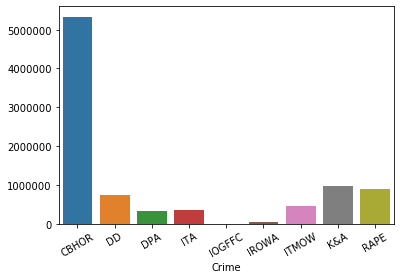

In [166]:
x = data.columns[2:-1]
y = []
temp = 0

for col in x:
    for ele in data.groupby(['State'])[col].sum():
        temp += ele
    y.append(temp)
    temp = 0
    
g = sns.barplot(x=x,y=y)
g = g.set_xticklabels(x,rotation=30)

From our visualtion it can be determined that the top three most frequent crimes against women are 
    1. CRUELTY BY HUSBAND OR HIS RELATIVES (IPC SECTION 498A)
    2. KIDNAPPING AND ABDUCTION
    3. RAPE

Looking at the visualization, there is a very clear skew towards family abuse towards women. There is an incredible difference. 

In the below bar graphs we will visualize the data so that we are able to point out which state has the highest frequency of each of these crimes and maybe see if any states are skewing this data.

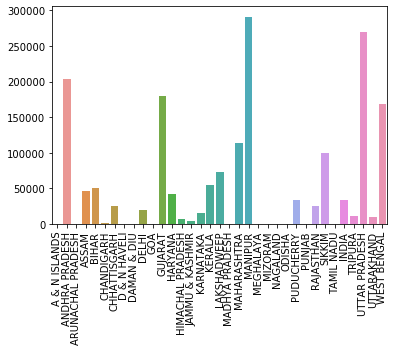

In [167]:
x = np.delete(data["State"].unique(), [15, 32, 33])
y = []
temp = data.groupby(['State'])['CBHOR'].sum()
temp = temp.drop(labels=['INDIA', 'TOTAL (STATES)', 'TOTAL (UTs)'])


for b in temp:
    y.append(b)

g = sns.barplot(x=x,y=y)
g = g.set_xticklabels(x,rotation=90)

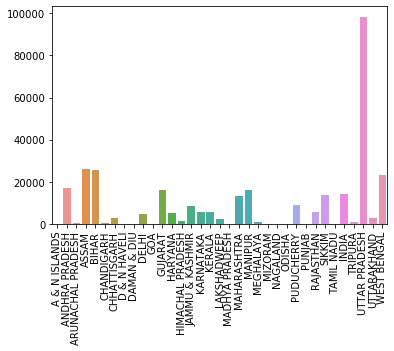

In [168]:
y = []
temp = data.groupby(['State'])['K&A'].sum()
temp = temp.drop(labels=['INDIA', 'TOTAL (STATES)', 'TOTAL (UTs)'])

for b in temp:
    y.append(b)

g = sns.barplot(x=x,y=y)
g = g.set_xticklabels(x,rotation=90)

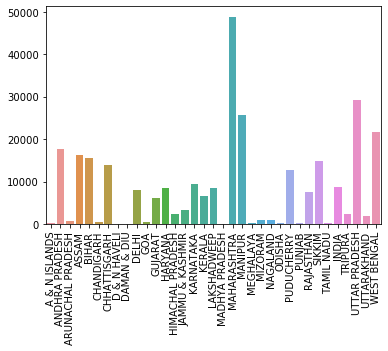

In [169]:
y = []
temp = data.groupby(['State'])['RAPE'].sum()
temp = temp.drop(labels=['INDIA', 'TOTAL (STATES)', 'TOTAL (UTs)'])

for b in temp:
    y.append(b)

g = sns.barplot(x=x,y=y)
g = g.set_xticklabels(x,rotation=90)

From our visualtions we see that Maharastra has the most occurrences of rape, Uttar Pradesh has the most occurrences of kidnapping & abductions, and Manipur has the highest occurrences of cruelty by husband or his relatives. There is a surprising amount of variety show in the most common crimes per area. Furthermore, these cities are rather far from each other, perhaps implying a geographical significance.

In [170]:
# geojson data for India's states
state_geo = 'states2.json'

# first get total crimes per state

sums = []
state_grouped = data.groupby("State")
states = data["State"].unique()
# delete districts and total's
states = np.delete(states, [0, 7, 8, 18, 26, 31, 32, 33])
states.astype(str)
states
for s in states:
    sums.append(float(state_grouped.get_group(s).sum()["TOTAL CRIMES"]))
    

# build dataframe for choropleth
st = pd.DataFrame(list(zip(states, sums)), 
               columns =['State', 'TC'])



st

map_osm = folium.Map(location=[21, 78], zoom_start=5)
folium.Choropleth(geo_data=state_geo, data=st, 
                  name="Incident by District", 
                  columns=['State', 'TC'],
                  key_on='feature.id',
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
                  legend_name='Number of crimes').add_to(map_osm)

map_osm

This interactive map shows us a great visualization of the geographical layout of total crime against women. Looking closely at the map, you can clearly see areas like Hyderabad, Dehli and Uttar Pradesh showing up in the darkest areas of the country. These areas are notorious for their number of heinous, widespread crimes against women. Each have a list of tragedies adding up every month. Indeed, Uttar Pradesh was recently ranked the <a href="https://www.livemint.com/news/india/uttar-pradesh-most-unsafe-for-women-ncrb-2017-data-11571713024560.html" target="_blank">most dangerous state</a> in India to live in. This is clearly highlighted by the dark, blood red overlaying it.




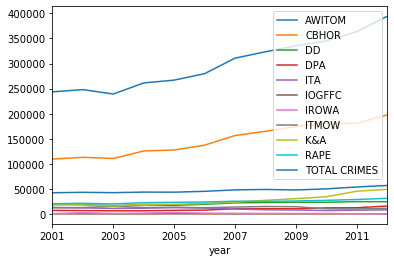

In [171]:
x = state_data["year"].unique()
temp = state_data[state_data.State == "INDIA"].drop(['GDP'], axis=1).plot('year')

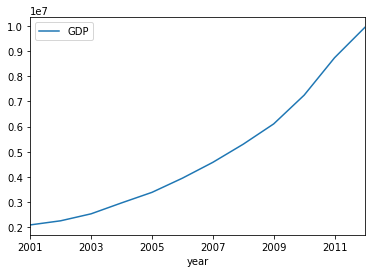

In [172]:
x = state_data["year"].unique()
temp = state_data[state_data.State == "INDIA"].plot('year', 'GDP')

From the two graphs above we see that it is more likely to see a positive trend in both the GDP of India and in total crime per state. This is an interesting observation we want to explore futher. Below we have constructed a heat map where we can identify the exact correlation of GDP and the total crimes against women in India. 

In [173]:
india_totals = state_data[state_data.State == "INDIA"]
india_totals = india_totals.iloc[:,2:]
india_totals = india_totals.corr()
india_totals

,GDP,AWITOM,CBHOR,DD,DPA,ITA,IOGFFC,IROWA,ITMOW,K&A,RAPE,TOTAL CRIMES
GDP,1.000000,0.980991,0.959602,0.866098,0.962880,-0.859168,-0.121506,-0.636257,-0.568720,0.984989,0.978134,0.982137
AWITOM,0.980991,1.000000,0.944339,0.878550,0.978290,-0.829092,-0.121797,-0.648816,-0.538430,0.976299,0.975406,0.976267
CBHOR,0.959602,0.944339,1.000000,0.908163,0.949860,-0.915636,-0.204966,-0.596282,-0.430059,0.914214,0.965237,0.991551
DD,0.866098,0.878550,0.908163,1.000000,0.901491,-0.860801,-0.022972,-0.738956,-0.459091,0.864021,0.857407,0.913937
DPA,0.962880,0.978290,0.949860,0.901491,1.000000,-0.837925,-0.140765,-0.665943,-0.497298,0.947477,0.957185,0.973520
ITA,-0.859168,-0.829092,-0.915636,-0.860801,-0.837925,1.000000,0.281370,0.648736,0.305433,-0.807850,-0.808385,-0.887539
IOGFFC,-0.121506,-0.121797,-0.204966,-0.022972,-0.140765,0.281370,1.000000,0.154742,-0.279905,-0.043118,-0.119800,-0.154927
IROWA,-0.636257,-0.648816,-0.596282,-0.738956,-0.665943,0.648736,0.154742,1.000000,0.259850,-0.651595,-0.540799,-0.621519
ITMOW,-0.568720,-0.538430,-0.430059,-0.459091,-0.497298,0.305433,-0.279905,0.259850,1.000000,-0.630220,-0.565542,-0.485186
K&A,0.984989,0.976299,0.914214,0.864021,0.947477,-0.807850,-0.043118,-0.651595,-0.630220,1.000000,0.956798,0.955085


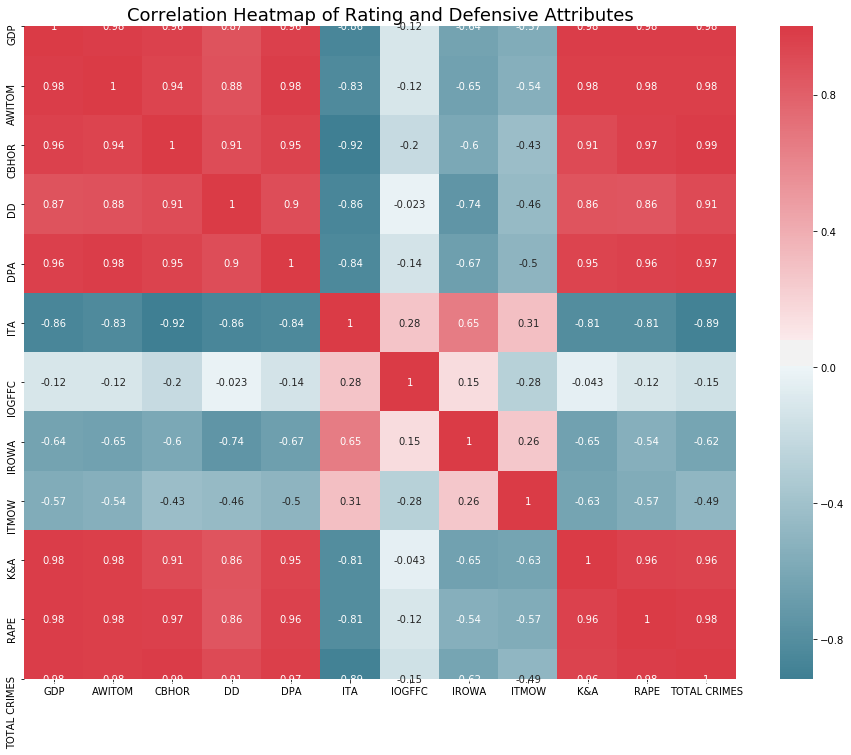

In [174]:
plt.figure(figsize=(16,12))
plt.title("Correlation Heatmap of Rating and Defensive Attributes", fontsize=18)
sns.heatmap(india_totals, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True)
plt.show()

# Coclusions from of Exploratory Data

    1.  a. From our exploratory analysis we can clearly see that cruelty by husband or his relative is significantly more frequent nationwide. Though this is a devastating statistic, it would not surpise most, there are many corraborating sources that would demostarate this exact trend (https://www.news18.com/news/india/the-elephant-in-the-room-every-third-woman-in-india-faces-domestic-violence-1654193.html). 
        b.But other than the overwhelming amount of data allocated to in the CBHOHR category we cannot observe any other obvious trends or patterns in the distribution of the data. 
    2.  a. After identifying CBHOHR as the most frequently occurring crime in the nation we decided to do a further investigation and analyze the trends of the states and the number of occurrences of these crimes. From the visualizations we can deduce that the states that we classified as the most frequented with the particular crime was the clear maximum. 
        b. Another interesting observation we were able to make is that all three states that were the clear maximum are very far from each other. This leads us to believe that violence against women in India is likely to be widespread. 
    3.  a. The last piece of our exploratory analysis was investgiating the relationship between GDP and the different types of crime. We were able to observe in our line graphs that GDP and most crime occurrences increased over time. While this doesn't necessarily prove much about the relationship between the crime data and the GDP, we were still interetested to dive deeper and build a visualization that could better represent correlation.
        b. We built a heat map so that we would able to quantitively tell the correlation between the GDP and the a given type of crime occurring. 


# ANALYSIS, HYPOTHESIS TESTING, AND MACHINE LEARNING:

Our last pahse of our analysis is data modeling. In this phase, our goal is to use linear regression to predict the occurrance of crimes in upcoming years. We will leverage the data we have already synthesized in this turtorial to decifer data that exists outside of the scope of our set. We will be caling on machine learining libraries throughout this section since they already effectively and effeciently calculate the estimates we need,

For the purposes of this tutorial we are choose to focus on a select few crimes, these include the top 3 occurring crimes we pointed out previously; cruelty by husband or his relatives, kidnapping and abduction, and rape.

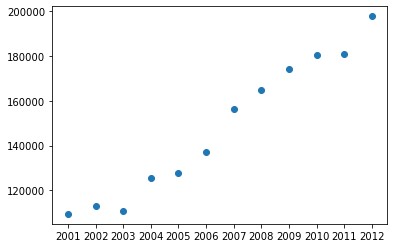

In [175]:
# plot for CBHOR
x = state_data["year"].unique()
y = state_data[state_data.State == "INDIA"]['CBHOR']
g = plt.scatter(x, y)


We can clearly identify a linear positive trend in our data. We can now take this representation and plot a line of best fit.

[[2001], [2002], [2003], [2004], [2005], [2006], [2007], [2008], [2009], [2010], [2011], [2012]]


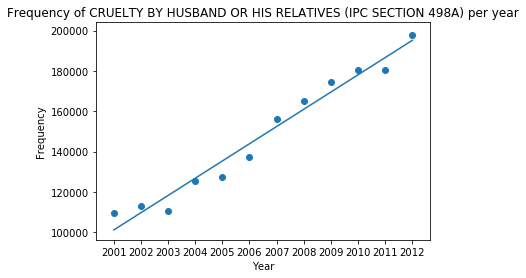

In [176]:
years_ = []
for i in x:
    years_.append([int(i)])

clf = linear_model.LinearRegression()
clf.fit(years_, y)
print(years_)
predicted = clf.predict(years_)

plt.plot(x,predicted)
plt.scatter(x, y)
plt.title("Frequency of CRUELTY BY HUSBAND OR HIS RELATIVES (IPC SECTION 498A) per year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

In [177]:
print(clf.score(years_,y))


0.9678941341853252


In [178]:
clf.predict([[2020]])

array([263543.61655011])

Our R^2 value is very high, so we can be confident in our model. There is a high probability any assumptions and predictions about our data set is accurate because we were abel to define a strong pattern in our dataset. We will now use this value to leverage another machine learning capability of the skleanr library.

Our next step is to actually use this model to predict future values of the number of occurrances of each crime. When we made our prediction our model projected that in 2020 there will be approximately 64592.6 occurrances of cruelty by husband or a relative. 

We hypothesize that the increase of record of all these crimes is because of a culture shift that Indian and a lot of south aisan countries are groing through right now. More and more women are feeling empowered to speak openly about feeling marginalized by their communities and country. More people in positions of power are also speaking on these issues, so the conversation on womens rigthts and equality has had this domino effect of more and more women reporting.

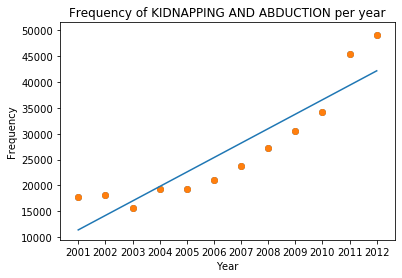

In [179]:
# plor for k&a
x = state_data["year"].unique()
y = state_data[state_data.State == "INDIA"]['K&A']
g = plt.scatter(x, y)

years_ = []
for i in x:
    years_.append([int(i)])

clf = linear_model.LinearRegression()
clf.fit(years_, y)
predicted = clf.predict(years_)

plt.plot(x,predicted)
plt.scatter(x, y)
plt.title("Frequency of KIDNAPPING AND ABDUCTION per year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

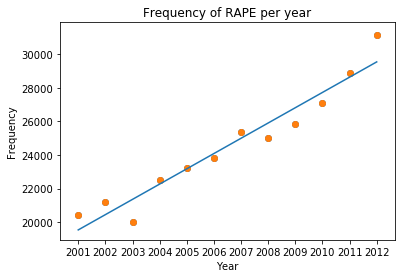

In [180]:
# plot for rape 
x = state_data["year"].unique()
y = state_data[state_data.State == "INDIA"]['RAPE']
g = plt.scatter(x, y)

years_ = []
for i in x:
    years_.append([int(i)])

clf = linear_model.LinearRegression()
clf.fit(years_, y)
predicted = clf.predict(years_)

plt.plot(x,predicted)
plt.scatter(x, y)
plt.title("Frequency of RAPE per year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

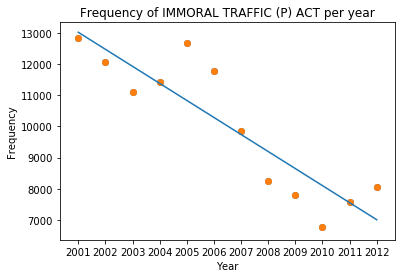

In [181]:
# plot for ITA
x = state_data["year"].unique()
y = state_data[state_data.State == "INDIA"]['ITA']
g = plt.scatter(x, y)

years_ = []
for i in x:
    years_.append([int(i)])

clf = linear_model.LinearRegression()
clf.fit(years_, y)
predicted = clf.predict(years_)

plt.plot(x,predicted)
plt.scatter(x, y)
plt.title("Frequency of IMMORAL TRAFFIC (P) ACT per year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

# Conclusion

Our analysis was split into three parts. Analysis on types of crime against women, analysis on the states, and analysis of GDP. We quickly disocvered the lack of substance in the correlation between GDP and crime amounts. In the beginning of our exploratory analysis, we found an overwhelming skew of crime towards family abuse. Through our linear regression plots, we were able to see an alarmingly steep trend for cruelty by husband or his relatives. 

These plots showed a very high level of linearity and correlation. From this, we can utilize the predictions made by these plots to make important decisions for the future. Understanding the key components of violence towards women is the first step to understanding the root causes systemic in Indian culture. This information is also very beneficial at a policy standpoint, as the crimes which are trending are perhaps the most important to cut down. 

Thanks for reading! Please let us know areas where we could have improved
